In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Carregando os arquivos Excel
excel_file1 = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Agua_bb_adulto.xlsx'
excel_file2 = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Bosque_bb_adulto.xlsx'

# Lista de abas para a primeira tabela
abas_agua = ['Gravador 01', 'Gravador 04', 'Gravador 05', 'Gravador 06']

# Lista de abas para a segunda tabela
abas_bosque = ['Gravador 01', 'Gravador 03', 'Gravador 04', 'Gravador 06', 'Gravador 07', 'Gravador 09']

# Lista para armazenar os dataframes de cada aba da primeira tabela
df_agua = []

# Lista para armazenar os dataframes de cada aba da segunda tabela
df_bosque = []

# Carregando os DataFrames de cada aba da primeira tabela
for aba in abas_agua:
    df_temp = pd.read_excel(excel_file1, sheet_name=aba)
    df_temp['Tabela'] = 'Água'
    df_agua.append(df_temp)

# Carregando os DataFrames de cada aba da segunda tabela
for aba in abas_bosque:
    df_temp = pd.read_excel(excel_file2, sheet_name=aba)
    df_temp['Tabela'] = 'Bosque'
    df_bosque.append(df_temp)

# Concatenando todos os dataframes em um único dataframe
combined_df_agua = pd.concat(df_agua, ignore_index=True)
combined_df_bosque = pd.concat(df_bosque, ignore_index=True)

# Convertendo a coluna de Data para o formato de data
combined_df_agua['Data'] = pd.to_datetime(combined_df_agua['Data'], format='%d/%m/%y')
combined_df_bosque['Data'] = pd.to_datetime(combined_df_bosque['Data'], format='%d/%m/%y')

# Filtrando pela vocalização 'phee' e 'trill' (sem filtro de tempo)
phee_data_agua = combined_df_agua[combined_df_agua['Classificacao'] == 'phee adulto'].copy()
trill_data_agua = combined_df_agua[combined_df_agua['Classificacao'] == 'trill adulto'].copy()

phee_data_bosque = combined_df_bosque[combined_df_bosque['Classificacao'] == 'phee adulto'].copy()
trill_data_bosque = combined_df_bosque[combined_df_bosque['Classificacao'] == 'trill adulto'].copy()

# Criando uma coluna 'Mês' para armazenar o mês de cada data
phee_data_agua['Mês'] = phee_data_agua['Data'].dt.month
trill_data_agua['Mês'] = trill_data_agua['Data'].dt.month
phee_data_bosque['Mês'] = phee_data_bosque['Data'].dt.month
trill_data_bosque['Mês'] = trill_data_bosque['Data'].dt.month

# Criando uma coluna 'Período' para categorizar os meses
phee_data_agua['Período'] = 'Seca'
phee_data_agua.loc[phee_data_agua['Mês'].between(3, 7), 'Período'] = 'Chuvoso'

trill_data_agua['Período'] = 'Seca'
trill_data_agua.loc[trill_data_agua['Mês'].between(3, 7), 'Período'] = 'Chuvoso'

phee_data_bosque['Período'] = 'Seca'
phee_data_bosque.loc[phee_data_bosque['Mês'].between(3, 7), 'Período'] = 'Chuvoso'

trill_data_bosque['Período'] = 'Seca'
trill_data_bosque.loc[trill_data_bosque['Mês'].between(3, 7), 'Período'] = 'Chuvoso'

# Definindo a paleta de cores
paleta_cores = {'Água': 'blue', 'Bosque': 'green'}

# Unificando os dataframes filtrados
filtered_data = pd.concat([phee_data_agua, trill_data_agua, phee_data_bosque, trill_data_bosque])

# Criando uma coluna 'Grupo' para fins de plotagem
filtered_data['Grupo'] = filtered_data['Tabela']

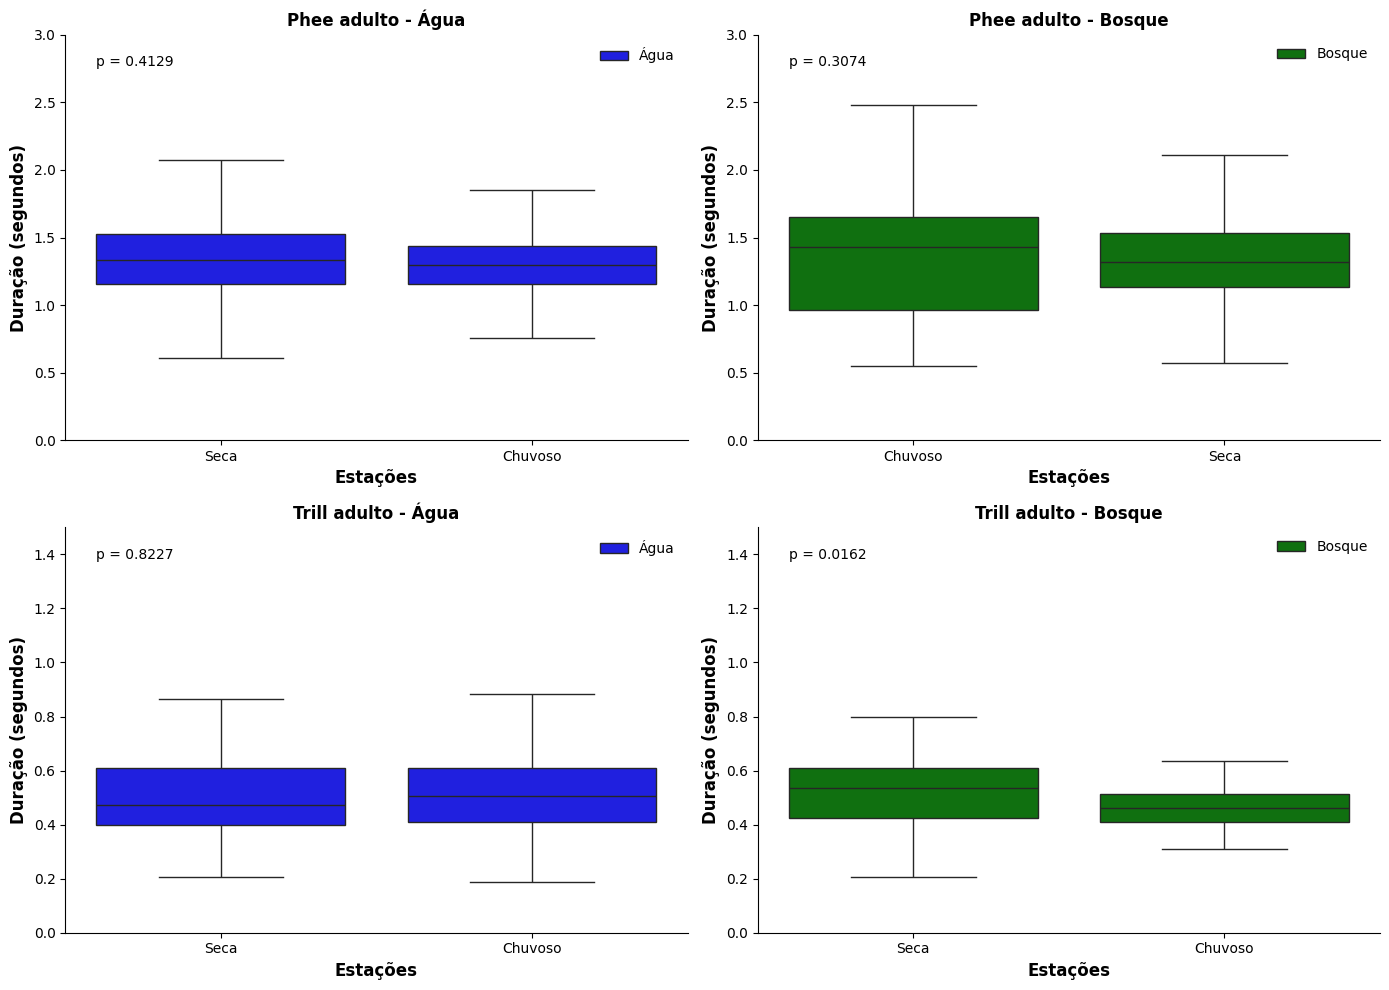

In [4]:
# Função para realizar o teste t e adicionar o p-valor nos gráficos
def perform_ttest_and_plot(data1, data2, label1, label2, ax):
    # Realizando o teste t
    t_stat, p_value = ttest_ind(data1['Tempototal'], data2['Tempototal'], equal_var=False)
    
    # Adicionando o valor-p no canto superior esquerdo do gráfico
    ax.text(0.05, 0.95, f"p = {p_value:.4f}", ha='left', va='top', transform=ax.transAxes,
            fontsize=10, bbox=dict(facecolor='white', edgecolor='none'))
    

# Criando os gráficos de boxplot usando seaborn
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Definindo a paleta de cores
paleta_cores = {'Água': 'blue', 'Bosque': 'green'}

# Boxplot para phee adulto - Água vs Água
sns.boxplot(x='Período', y='Tempototal', hue='Tabela', data=phee_data_agua, ax=axes[0, 0], palette=paleta_cores, showfliers=False)
axes[0, 0].set_title('Phee adulto - Água', size=12, weight="bold")
axes[0, 0].set_ylim(0, 3) 
perform_ttest_and_plot(phee_data_agua[phee_data_agua['Período'] == 'Seca'],
                        phee_data_agua[phee_data_agua['Período'] == 'Chuvoso'],
                        "phee adulto - Água (Seca)",
                        "phee adulto - Água (Chuvoso)",
                        axes[0, 0])
# Remover as bordas superior e direita
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['right'].set_visible(False)
axes[0, 0].set_ylabel('Duração (segundos)', size=12, weight="bold")
axes[0, 0].set_xlabel('Estações', size=12, weight="bold")
handles, labels = axes[0, 0].get_legend_handles_labels()
axes[0, 0].legend(handles, ['Água'], loc='upper right',edgecolor='none')

# Boxplot para phee adulto - Bosque vs Bosque
sns.boxplot(x='Período', y='Tempototal', hue='Tabela', data=phee_data_bosque, ax=axes[0, 1], palette=paleta_cores, showfliers=False)
axes[0, 1].set_title('Phee adulto - Bosque', size=12, weight="bold")
axes[0, 1].set_ylim(0, 3) 
perform_ttest_and_plot(phee_data_bosque[phee_data_bosque['Período'] == 'Seca'],
                        phee_data_bosque[phee_data_bosque['Período'] == 'Chuvoso'],
                        "phee adulto - Bosque (Seca)",
                        "phee adulto - Bosque (Chuvoso)",
                        axes[0, 1])
# Remover as bordas superior e direita
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].spines['right'].set_visible(False)
axes[0, 1].set_ylabel('Duração (segundos)', size=12, weight="bold")
axes[0, 1].set_xlabel('Estações', size=12, weight="bold")
handles, labels = axes[0, 1].get_legend_handles_labels()
axes[0, 1].legend(handles, ['Bosque'], loc='upper right', edgecolor='none')

# Boxplot para trill adulto - Água vs Água
sns.boxplot(x='Período', y='Tempototal', hue='Tabela', data=trill_data_agua, ax=axes[1, 0], palette=paleta_cores, showfliers=False)
axes[1, 0].set_title('Trill adulto - Água', size=12, weight="bold")
axes[1, 0].set_ylim(0, 1.5) 
perform_ttest_and_plot(trill_data_agua[trill_data_agua['Período'] == 'Seca'],
                        trill_data_agua[trill_data_agua['Período'] == 'Chuvoso'],
                        "trill adulto - Água (Seca)",
                        "trill adulto - Água (Chuvoso)",
                        axes[1, 0])
# Remover as bordas superior e direita
axes[1, 0].spines['top'].set_visible(False)
axes[1, 0].spines['right'].set_visible(False)
axes[1, 0].set_ylabel('Duração (segundos)', size=12, weight="bold")
axes[1, 0].set_xlabel('Estações', size=12, weight="bold")
handles, labels = axes[1, 0].get_legend_handles_labels()
axes[1, 0].legend(handles, ['Água'], loc='upper right', edgecolor='none')

# Boxplot para trill adulto - Bosque vs Bosque
sns.boxplot(x='Período', y='Tempototal', hue='Tabela', data=trill_data_bosque, ax=axes[1, 1], palette=paleta_cores, showfliers=False)
axes[1, 1].set_title('Trill adulto - Bosque',size=12, weight="bold")
axes[1, 1].set_ylim(0, 1.5) 
perform_ttest_and_plot(trill_data_bosque[trill_data_bosque['Período'] == 'Seca'],
                        trill_data_bosque[trill_data_bosque['Período'] == 'Chuvoso'],
                        "trill adulto - Bosque (Seca)",
                        "trill adulto - Bosque (Chuvoso)",
                        axes[1, 1])
# Remover as bordas superior e direita
axes[1, 1].spines['top'].set_visible(False)
axes[1, 1].spines['right'].set_visible(False)
axes[1, 1].set_ylabel('Duração (segundos)', size=12, weight="bold")
axes[1, 1].set_xlabel('Estações', size=12, weight="bold")
handles, labels = axes[1, 1].get_legend_handles_labels()
axes[1, 1].legend(handles, ['Bosque'], loc='upper right', edgecolor='none')

# Ajustando o layout
plt.tight_layout()
# plt.savefig(r'G:\Meu Drive\Mestrado\Triagem dos dados\imagens\boxplot_estações_phee adulto_comparação intragrupo.png', bbox_inches='tight')

# Mostrando os gráficos
plt.show()

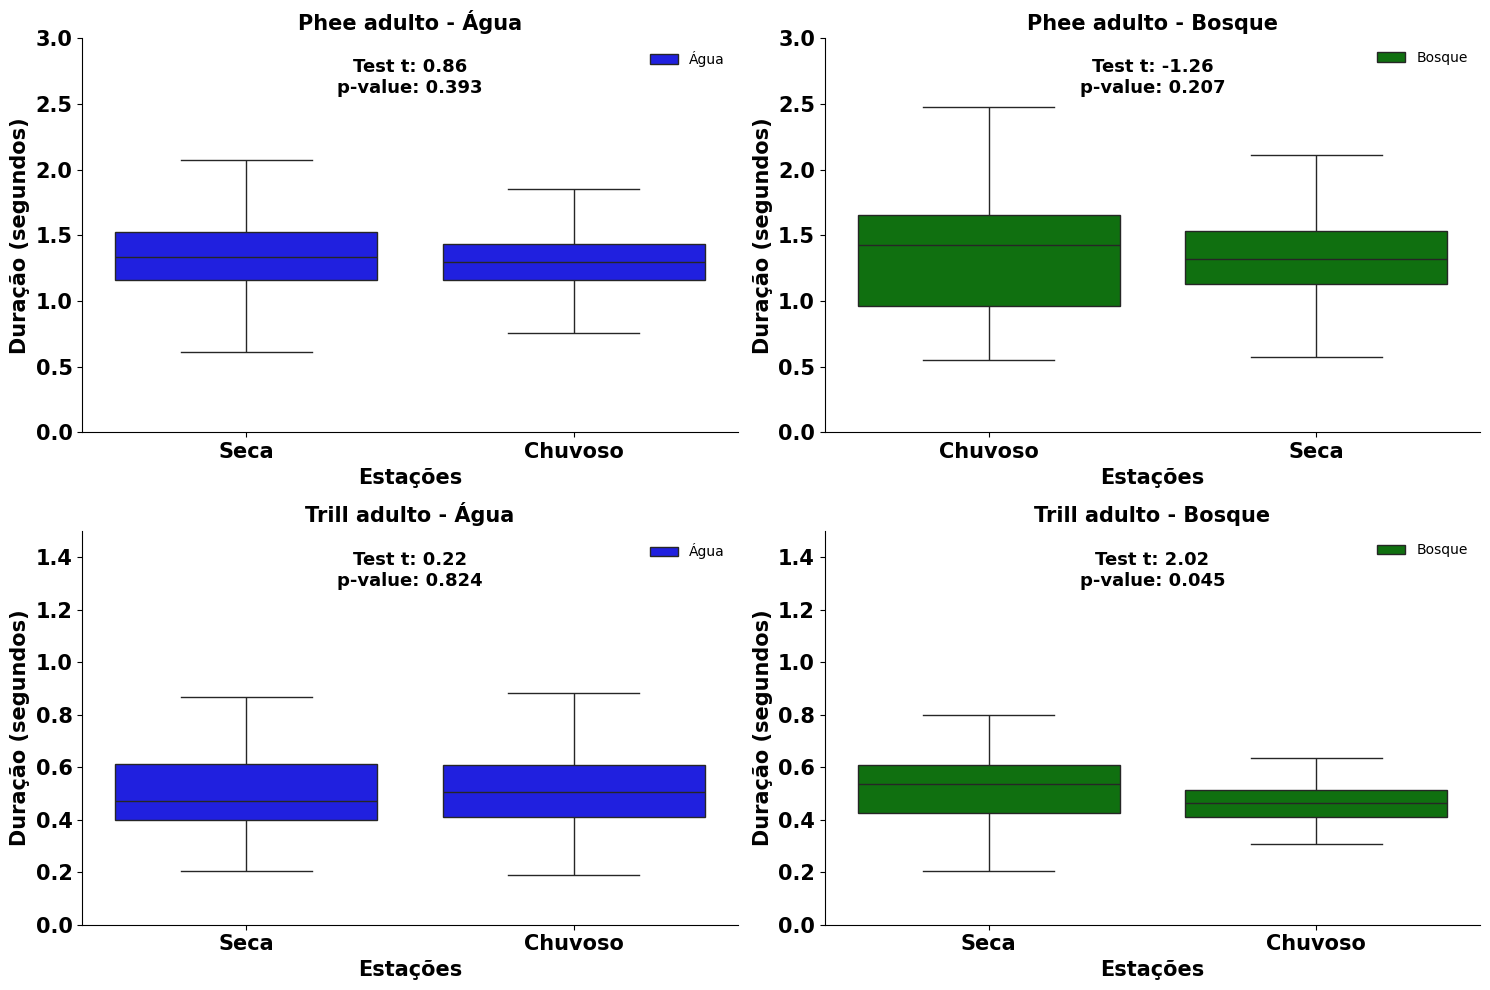

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Função para realizar o teste t e plotar os resultados
def perform_ttest_and_plot(data1, data2, label1, label2, ax):
    t_statistic, p_value = ttest_ind(data1['Tempototal'], data2['Tempototal'])
    ax.annotate(f'Test t: {t_statistic:.2f}\np-value: {p_value:.3f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', va='center', weight='bold', fontsize=13)

# Criando subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Definindo as cores para 'Água' e 'Bosque'
paleta_cores = {'Água': 'blue', 'Bosque': 'green'}

# Boxplot para phee adulto - Água vs Água
sns.boxplot(x='Período', y='Tempototal', hue='Tabela', data=phee_data_agua, ax=axes[0, 0], palette=paleta_cores, showfliers=False)
axes[0, 0].set_title('Phee adulto - Água', size=15, weight="bold")
axes[0, 0].set_ylim(0, 3)
perform_ttest_and_plot(phee_data_agua[phee_data_agua['Período'] == 'Seca'],
                        phee_data_agua[phee_data_agua['Período'] == 'Chuvoso'],
                        "phee adulto - Água (Seca)",
                        "phee adulto - Água (Chuvoso)",
                        axes[0, 0])
# Remover as bordas superior e direita
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['right'].set_visible(False)
axes[0, 0].set_ylabel('Duração (segundos)', size=15, weight="bold")
axes[0, 0].set_xlabel('Estações', size=15, weight="bold")
plt.setp(axes[0, 0].get_xticklabels(), fontsize=15, weight='bold')
plt.setp(axes[0, 0].get_yticklabels(), fontsize=15, weight='bold')
handles, labels = axes[0, 0].get_legend_handles_labels()
axes[0, 0].legend(handles, ['Água'], loc='upper right', edgecolor='none')

# Boxplot para phee adulto - Bosque vs Bosque
sns.boxplot(x='Período', y='Tempototal', hue='Tabela', data=phee_data_bosque, ax=axes[0, 1], palette=paleta_cores, showfliers=False)
axes[0, 1].set_title('Phee adulto - Bosque', size=15, weight="bold")
axes[0, 1].set_ylim(0, 3)
perform_ttest_and_plot(phee_data_bosque[phee_data_bosque['Período'] == 'Seca'],
                        phee_data_bosque[phee_data_bosque['Período'] == 'Chuvoso'],
                        "phee adulto - Bosque (Seca)",
                        "phee adulto - Bosque (Chuvoso)",
                        axes[0, 1])
# Remover as bordas superior e direita
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].spines['right'].set_visible(False)
axes[0, 1].set_ylabel('Duração (segundos)', size=15, weight="bold")
axes[0, 1].set_xlabel('Estações', size=15, weight="bold")
plt.setp(axes[0, 1].get_xticklabels(), fontsize=15, weight='bold')
plt.setp(axes[0, 1].get_yticklabels(), fontsize=15, weight='bold')
handles, labels = axes[0, 1].get_legend_handles_labels()
axes[0, 1].legend(handles, ['Bosque'], loc='upper right', edgecolor='none')

# Boxplot para trill adulto - Água vs Água
sns.boxplot(x='Período', y='Tempototal', hue='Tabela', data=trill_data_agua, ax=axes[1, 0], palette=paleta_cores, showfliers=False)
axes[1, 0].set_title('Trill adulto - Água', size=15, weight="bold")
axes[1, 0].set_ylim(0, 1.5)
perform_ttest_and_plot(trill_data_agua[trill_data_agua['Período'] == 'Seca'],
                        trill_data_agua[trill_data_agua['Período'] == 'Chuvoso'],
                        "trill adulto - Água (Seca)",
                        "trill adulto - Água (Chuvoso)",
                        axes[1, 0])
# Remover as bordas superior e direita
axes[1, 0].spines['top'].set_visible(False)
axes[1, 0].spines['right'].set_visible(False)
axes[1, 0].set_ylabel('Duração (segundos)', size=15, weight="bold")
axes[1, 0].set_xlabel('Estações', size=15, weight="bold")
plt.setp(axes[1, 0].get_xticklabels(), fontsize=15, weight='bold')
plt.setp(axes[1, 0].get_yticklabels(), fontsize=15, weight='bold')
handles, labels = axes[1, 0].get_legend_handles_labels()
axes[1, 0].legend(handles, ['Água'], loc='upper right', edgecolor='none')

# Boxplot para trill adulto - Bosque vs Bosque
sns.boxplot(x='Período', y='Tempototal', hue='Tabela', data=trill_data_bosque, ax=axes[1, 1], palette=paleta_cores, showfliers=False)
axes[1, 1].set_title('Trill adulto - Bosque', size=15, weight="bold")
axes[1, 1].set_ylim(0, 1.5)
perform_ttest_and_plot(trill_data_bosque[trill_data_bosque['Período'] == 'Seca'],
                        trill_data_bosque[trill_data_bosque['Período'] == 'Chuvoso'],
                        "trill adulto - Bosque (Seca)",
                        "trill adulto - Bosque (Chuvoso)",
                        axes[1, 1])
# Remover as bordas superior e direita
axes[1, 1].spines['top'].set_visible(False)
axes[1, 1].spines['right'].set_visible(False)
axes[1, 1].set_ylabel('Duração (segundos)', size=15, weight="bold")
axes[1, 1].set_xlabel('Estações', size=15, weight="bold")
plt.setp(axes[1, 1].get_xticklabels(), fontsize=15, weight='bold')
plt.setp(axes[1, 1].get_yticklabels(), fontsize=15, weight='bold')
handles, labels = axes[1, 1].get_legend_handles_labels()
axes[1, 1].legend(handles, ['Bosque'], loc='upper right', edgecolor='none')

# Ajustando o layout
plt.tight_layout()
plt.savefig(r'G:\Meu Drive\Mestrado\Triagem dos dados\imagens\boxplot_estações_phee adulto_comparação intragrupo.png', bbox_inches='tight')

# Mostrando os gráficos
plt.show()
